# Jacobi Method Algorithm coded By John Lain

In [1]:
import numpy as np
def jacobi(A, b, x0, iterations = 50, tol = 0.000001, true = None):
    """
    Solves a system of linear equations using the Jacobi method
    Expected inputs:
    A: nxn matrix
    b: column vector of length n
    x0: initial guess for solution
    tol: error between true and numerical solution
    true: true solution
    """
    count = 0
    x = x0
    d = np.diagonal(A)
    LU = A - np.diag(d)
    n = np.size(b)
    if type(true) == np.ndarray:
        while max(abs(true - x)) > tol:
            count = count + 1
            x = (1/d)*(b - LU@x)
        print(f"Number of iterations = {count}")
        return(x)
    else:
        for i in range(iterations):
            x = (1/d)*(b - LU@x)
        return(x)


## When writing this code, we run into a few errors: 
Creating different scenarios for the method alorithm when we include the true solution in our input lead to some issues, and had to use the code "type(true) == np.ndarray" which was not clear at first. 

At first, John tried to use matrix multiplication when multiplying by d inverse (like is done in the mathmatical algoritm), however, d is stored as an array in our code and because of vectorized nature of numpy, the solution was to just use the normal multiplication operator.

## Testing the Algorithm

- Example from HW 3

In [2]:
L = np.diag(-np.ones(99), -1)
U = np.diag(-np.ones(99), 1)
d = np.diag(3*np.ones(100))
A = L + U + d
b = np.array([2] + [1]*98 + [2])
x = jacobi(A, b, np.zeros(100), tol = 0.000001, true = np.ones(100))
x


Number of iterations = 35


array([0.99999991, 0.99999982, 0.99999974, 0.99999966, 0.99999959,
       0.99999953, 0.99999948, 0.99999943, 0.9999994 , 0.99999937,
       0.99999936, 0.99999934, 0.99999933, 0.99999932, 0.99999932,
       0.99999932, 0.99999932, 0.99999931, 0.99999931, 0.99999931,
       0.99999931, 0.99999931, 0.99999931, 0.99999931, 0.99999931,
       0.99999931, 0.99999931, 0.99999931, 0.99999931, 0.99999931,
       0.99999931, 0.99999931, 0.99999931, 0.99999931, 0.99999931,
       0.99999931, 0.99999931, 0.99999931, 0.99999931, 0.99999931,
       0.99999931, 0.99999931, 0.99999931, 0.99999931, 0.99999931,
       0.99999931, 0.99999931, 0.99999931, 0.99999931, 0.99999931,
       0.99999931, 0.99999931, 0.99999931, 0.99999931, 0.99999931,
       0.99999931, 0.99999931, 0.99999931, 0.99999931, 0.99999931,
       0.99999931, 0.99999931, 0.99999931, 0.99999931, 0.99999931,
       0.99999931, 0.99999931, 0.99999931, 0.99999931, 0.99999931,
       0.99999931, 0.99999931, 0.99999931, 0.99999931, 0.99999

## Algorithm written by Chat GPT 3.5:

In [3]:
def jacobi_GPT(A, b, x0, tol=1e-6, max_iter=1000):
    n = len(b)
    x = np.array(x0, dtype=float)
    x_new = np.zeros_like(x)
    
    for _ in range(max_iter):
        for i in range(n):
            sum_ = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sum_) / A[i, i]
        
        if np.linalg.norm(x_new - x) < tol:
            return x_new
        
        x = np.copy(x_new)
    
    raise ValueError("Jacobi method did not converge within the maximum number of iterations")

- Chat gpts code stops the alorithm when the difference between the new value and the last value is less than a certain amount, which is different than our code which uses a set number of iterations (or requires the solution which is helpful for testing)

## Testing Chat GPT's code with the same example from HW 3

In [4]:
L = np.diag(-np.ones(99), -1)
U = np.diag(-np.ones(99), 1)
d = np.diag(3*np.ones(100))
A = L + U + d
b = np.array([2] + [1]*98 + [2])
x_GPT = jacobi_GPT(A, b, np.zeros(100), tol = 0.000001)
print(x_GPT)
print(max(abs(x_GPT - x)))

[0.99999997 0.99999995 0.99999992 0.9999999  0.99999988 0.99999987
 0.99999985 0.99999984 0.99999983 0.99999982 0.99999981 0.99999981
 0.9999998  0.9999998  0.9999998  0.9999998  0.9999998  0.9999998
 0.9999998  0.9999998  0.9999998  0.9999998  0.9999998  0.9999998
 0.9999998  0.9999998  0.9999998  0.9999998  0.9999998  0.9999998
 0.9999998  0.9999998  0.9999998  0.9999998  0.9999998  0.9999998
 0.9999998  0.9999998  0.9999998  0.9999998  0.9999998  0.9999998
 0.9999998  0.9999998  0.9999998  0.9999998  0.9999998  0.9999998
 0.9999998  0.9999998  0.9999998  0.9999998  0.9999998  0.9999998
 0.9999998  0.9999998  0.9999998  0.9999998  0.9999998  0.9999998
 0.9999998  0.9999998  0.9999998  0.9999998  0.9999998  0.9999998
 0.9999998  0.9999998  0.9999998  0.9999998  0.9999998  0.9999998
 0.9999998  0.9999998  0.9999998  0.9999998  0.9999998  0.9999998
 0.9999998  0.9999998  0.9999998  0.9999998  0.9999998  0.9999998
 0.9999998  0.9999998  0.9999998  0.9999998  0.99999981 0.99999981
 0.9999

The GPT 3.5 code produced a result extremely close to the result of our code. Asking Chat GPT to write the code took about 2 minutes, whereas the code we wrote took about an hour with trial and error being required.

In [5]:
A = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
b = np.array([0, 2, 0])
x = jacobi(A, b, np.zeros(3))
print(x)
x_gpt = jacobi_GPT(A, b, np.zeros(3))
print(x_gpt)

[0.99999997 1.99999994 0.99999997]
[0.99999905 1.99999905 0.99999905]


Above is another example from HW 3

- Both of the functions produced results close to the true solution

# Gradient Descent Method By Zhenyuan Ni

In [6]:
import numpy as np


def gradient_descent(gradient, start, learn_rate, n_iterations, tolerance):
    vector = start
    for _ in range(n_iterations):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector


# Example usage
# Define the gradient of your function here
def gradient_function(v):
    # Example for a 2D function: f(x, y) = x^2 + y^2
    return np.array([2 * v[0], 2 * v[1]])


# Starting point (can be any point in your domain)
start_point = np.array([10.0, 10.0])

# Learning rate
learn_rate = 0.1

# Number of iterations
n_iterations = 1000

# Tolerance for stopping criterion
tolerance = 1e-6

minimum = gradient_descent(gradient_function, start_point, learn_rate, n_iterations, tolerance)
print("Minimum at:", minimum)


# Multivariable case
def func(v):
    return v[0]**2 - v[1] * v[2]**2 + v[2] * v[3] * v[4]**2


def gradient_function1(v):
    # Example for a 2D function: f(x, y) = x1^2 - x2 * x3^2 + x3 * x4 * x5^2
    return np.array([2 * v[0], -v[1], 2*v[2] + v[3] + v[4], v[2] + v[4], v[3] + v[4]])


start_point = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
minimum = gradient_descent(gradient_function1, start_point, learn_rate, n_iterations, tolerance)
print("Minimum at:", minimum)
ylist = []
for x1 in range(10):
    for x2 in range(10):
        for x3 in range(10):
            for x4 in range(10):
                for x5 in range(10):
                    ylist.append(func([1 + 0.1 * x1, 4 + 0.1 * x2, -6 + 0.1 * x3, 4 + 0.1 * x4, -2 + 0.1 * x5]))
miny = np.min(ylist) - func(minimum)
print(miny)


Minimum at: [4.01734511e-06 4.01734511e-06]
Minimum at: [ 1.23023192e-97  4.93986584e+41 -6.29828712e+29  4.07127679e+30
 -2.35055275e+30]
1.4167495700510191e+121


# Chatgpt 3.5 Gradient Descent method

Chat Gpt notes that a common optimization for better efficiency is to use vectorized coding instead:

- One common optimization is to use vectorized operations whenever possible to leverage the computational efficiency of NumPy. 
- Additionally, we can adjust the step size dynamically during optimization to improve convergence. 

Here's the optimized version of the code:

In [7]:
import numpy as np

def gradient_descent(gradient, start, learn_rate, n_iterations, tolerance):
    vector = start
    for _ in range(n_iterations):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
        # Adjust learning rate dynamically
        learn_rate *= 0.9  # or any other suitable decay factor
    return vector

# Example usage
# Define the gradient of your function here
def gradient_function(v):
    # Example for a 2D function: f(x, y) = x^2 + y^2
    return np.array([2 * v[0], 2 * v[1]])

# Starting point (can be any point in your domain)
start_point = np.array([10.0, 10.0])

# Learning rate
learn_rate = 0.1

# Number of iterations
n_iterations = 1000

# Tolerance for stopping criterion
tolerance = 1e-6

minimum = gradient_descent(gradient_function, start_point, learn_rate, n_iterations, tolerance)
print("Minimum at:", minimum)

# Multivariable case
def func(v):
    return v[0]**2 - v[1] * v[2]**2 + v[2] * v[3] * v[4]**2

def gradient_function1(v):
    # Gradient of the function f(v) = v[0]^2 - v[1] * v[2]^2 + v[2] * v[3] * v[4]^2
    grad = np.zeros_like(v)
    grad[0] = 2 * v[0]
    grad[1] = -v[2]**2
    grad[2] = -2 * v[1] * v[2] + v[3] * v[4]**2
    grad[3] = v[2] * v[4]**2
    grad[4] = 2 * v[2] * v[3] * v[4]
    return grad


start_point = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
minimum = gradient_descent(gradient_function1, start_point, learn_rate, n_iterations, tolerance)
print("Minimum at:", minimum)

# No need to search for minimum manually
# Minimum value can be calculated directly from the function
miny = func(minimum)
print(miny)


Minimum at: [1.20459505 1.20459505]
Minimum at: [0.12045854        nan        nan        nan        nan]
nan


/var/folders/xh/4xpwy9dj7glg3lpzyn0wwqgw0000gn/T/ipykernel_11798/1267282877.py:43: RuntimeWarning: overflow encountered in scalar power
  grad[1] = -v[2]**2
/var/folders/xh/4xpwy9dj7glg3lpzyn0wwqgw0000gn/T/ipykernel_11798/1267282877.py:44: RuntimeWarning: overflow encountered in scalar power
  grad[2] = -2 * v[1] * v[2] + v[3] * v[4]**2
/var/folders/xh/4xpwy9dj7glg3lpzyn0wwqgw0000gn/T/ipykernel_11798/1267282877.py:45: RuntimeWarning: overflow encountered in scalar power
  grad[3] = v[2] * v[4]**2
/var/folders/xh/4xpwy9dj7glg3lpzyn0wwqgw0000gn/T/ipykernel_11798/1267282877.py:46: RuntimeWarning: overflow encountered in scalar multiply
  grad[4] = 2 * v[2] * v[3] * v[4]
/var/folders/xh/4xpwy9dj7glg3lpzyn0wwqgw0000gn/T/ipykernel_11798/1267282877.py:44: RuntimeWarning: invalid value encountered in scalar add
  grad[2] = -2 * v[1] * v[2] + v[3] * v[4]**2
/var/folders/xh/4xpwy9dj7glg3lpzyn0wwqgw0000gn/T/ipykernel_11798/1267282877.py:9: RuntimeWarning: invalid value encountered in add
  vector

We see that there was an overflow issue with the results in the code. This is primarily due to:

- the gradient vector was properly updated, and for multivariate cases we see this is an issue that can arise for wrong initial guesses, 
- The need to change hyperparameters (learning rate, iterations etc.)

This can be explored more so in another course but this is very interesting to see what can cause runtime warnings 

# Finally is Reese's RK4 method coupled with the Rossler and Chen Attractor

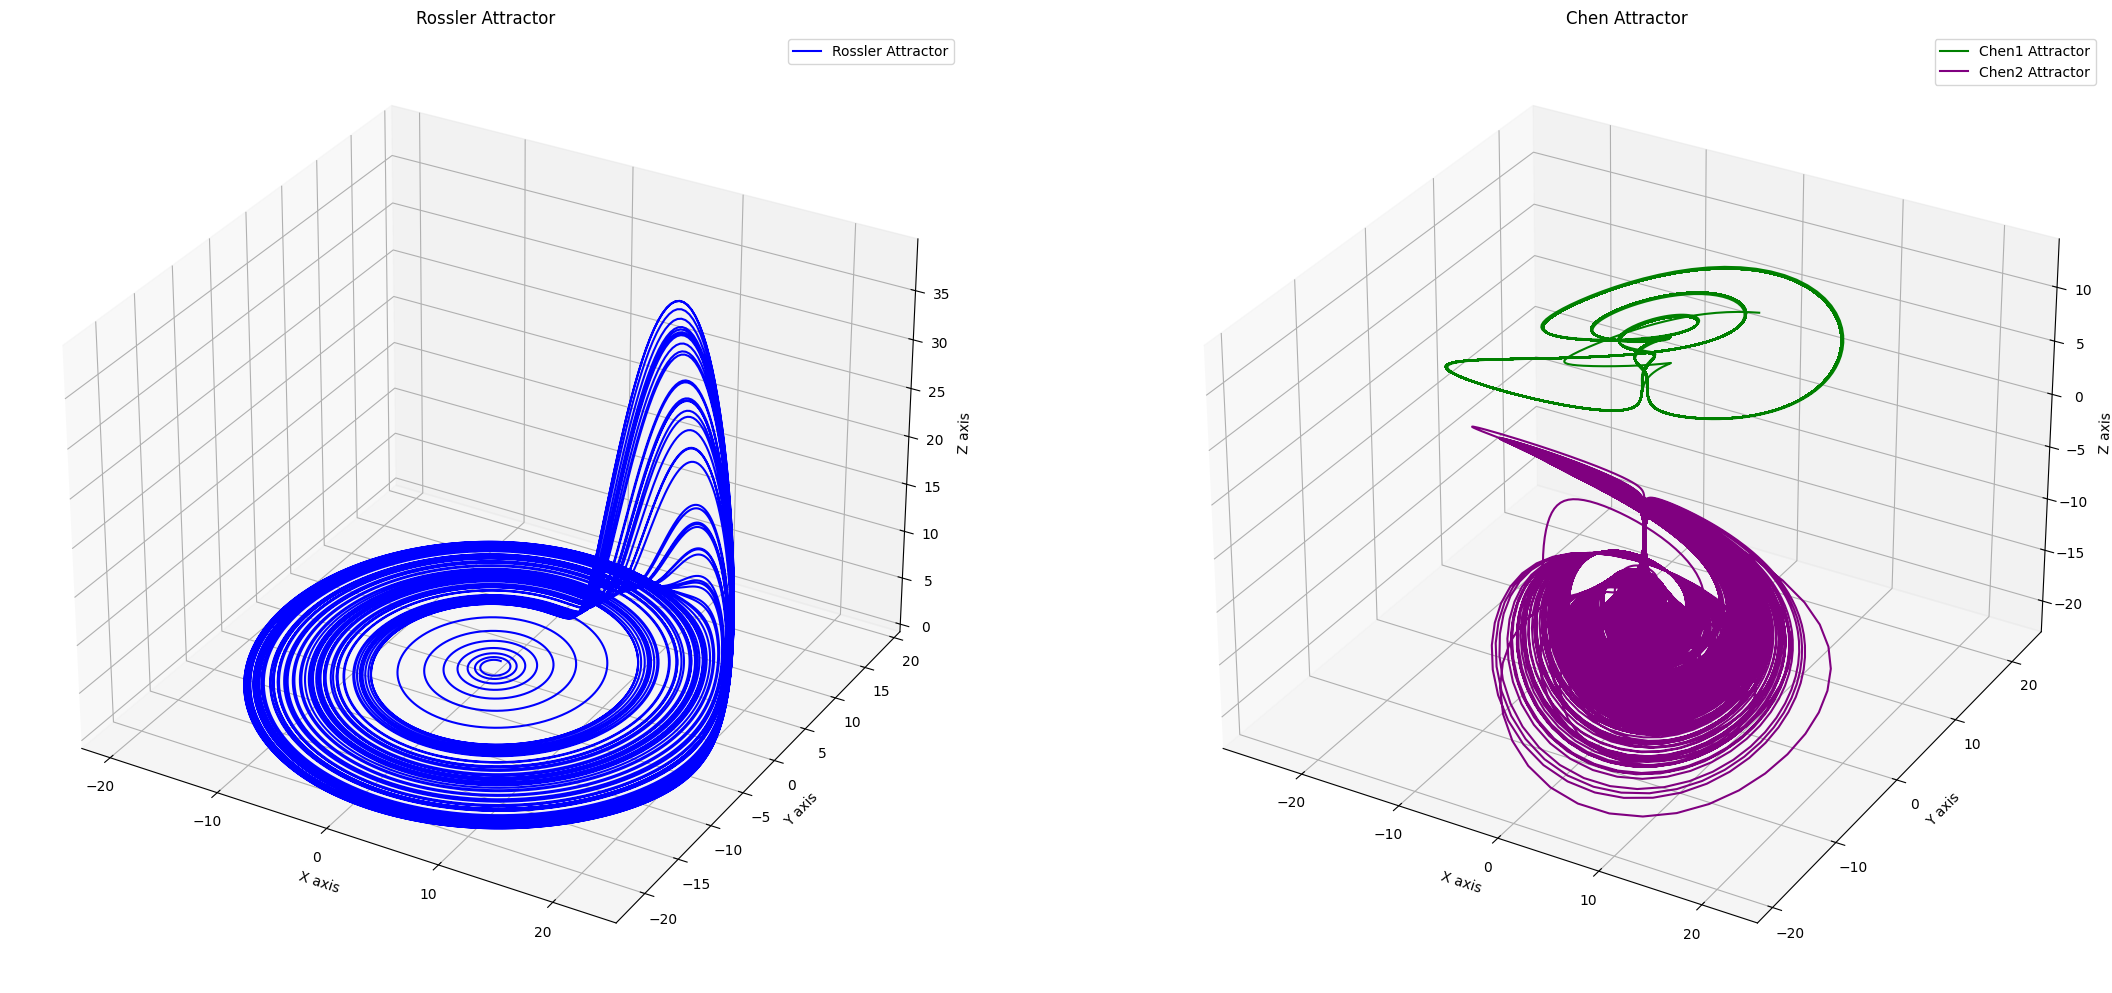

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from typing import Callable
def rossler(xyz, a=0.1, b=0.1, c=14):
    """
    Defines the Rossler attractor.

    Parameters:
    - xyz: A tuple or list of current [x, y, z] coordinates.
    - a, b, c: Parameters that define the behavior of the attractor.

    Returns:
    - An array of derivatives [dx, dy, dz].
    """
    x, y, z = xyz
    dx = -y - z
    dy = x + a * y
    dz = b + z * (x - c)
    return np.array([dx, dy, dz])

def Chen(xyz, a=5, b=-10, c=-0.38):
    """
    Defines the Chen attractor.

    Parameters:
    - xyz: A tuple or list of current [x, y, z] coordinates.
    - a, b, c: Parameters that define the behavior of the attractor.

    Returns:
    - An array of derivatives [dx, dy, dz].
    """
    x, y, z = xyz
    dx = a * x - y * z
    dy = b * y + x * z
    dz = c * z + (x * y) / 3
    return np.array([dx, dy, dz])

def Runge_kutta_4(f: Callable, x0: float, y0: float, z0: float, h: float, TT: float) -> np.ndarray:
    """
    Implements the fourth-order Runge-Kutta method for solving ODEs.

    Parameters:
    - f: The function representing the ODE system (e.g., rossler, Chen).
    - x0, y0, z0: Initial conditions for the ODE system.
    - h: Step size.
    - TT: Total time for which the solution is computed.

    Returns:
    - A numpy array containing the solution at each time step.
    """
    initial_conditions = [x0, y0, z0]
    time_start, time_end = 0, TT
    num_steps = int((time_end - time_start) / h)

    xyz = np.zeros((num_steps, 3))
    xyz[0, :] = initial_conditions

    for i in range(num_steps-1):
        # Calculate the four increments
        k1 = h * f(xyz[i, :])
        k2 = h * f(xyz[i, :] + 0.5 * k1)
        k3 = h * f(xyz[i, :] + 0.5 * k2)
        k4 = h * f(xyz[i, :] + h * k3)
        # Update the solution
        xyz[i + 1, :] = xyz[i, :] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return xyz


# initial conditions
### Rossler
x0, y0, z0 = 0, 1, 0

### Chen
x1,y1,z1 = 5,10,10
x2,y2,z2 = -7,-5,-10


trajectory_rossler = Runge_kutta_4(rossler, x0=x0, y0=y0, z0=z0, h=0.01, TT=500)
trajectory_Chen1 = Runge_kutta_4(Chen, x0=x1, y0=y1, z0=z1, h=0.01, TT = 1000)
trajectory_Chen2 = Runge_kutta_4(Chen, x0=x2, y0=y2, z0=z2, h=0.01, TT = 1000)


### Plotting the trajctory

# [Assuming 'trajectory_rossler', 'trajectory_Chen1', and 'trajectory_Chen2' are already computed]

fig, axs = plt.subplots(1, 2, figsize=(27, 16), subplot_kw={'projection': '3d'})

# Plotting the Rossler trajectory
axs[0].plot(trajectory_rossler[:, 0], trajectory_rossler[:, 1], trajectory_rossler[:, 2], color="blue", label="Rossler Attractor")
axs[0].set_xlabel('X axis')
axs[0].set_ylabel('Y axis')
axs[0].set_zlabel('Z axis')
axs[0].set_title('Rossler Attractor')
axs[0].legend()  # Adding legend to the first subplot

# Plotting the Chen trajectories
axs[1].plot(trajectory_Chen1[:, 0], trajectory_Chen1[:, 1], trajectory_Chen1[:, 2], color="green", label="Chen1 Attractor")
axs[1].plot(trajectory_Chen2[:, 0], trajectory_Chen2[:, 1], trajectory_Chen2[:, 2], color="purple", label="Chen2 Attractor")
axs[1].set_xlabel('X axis')
axs[1].set_ylabel('Y axis')
axs[1].set_zlabel('Z axis')
axs[1].set_title('Chen Attractor')
axs[1].legend()  # Adding legend to the second subplot

plt.show()

# Chat GPT 4.0 model building a similar script to the one above

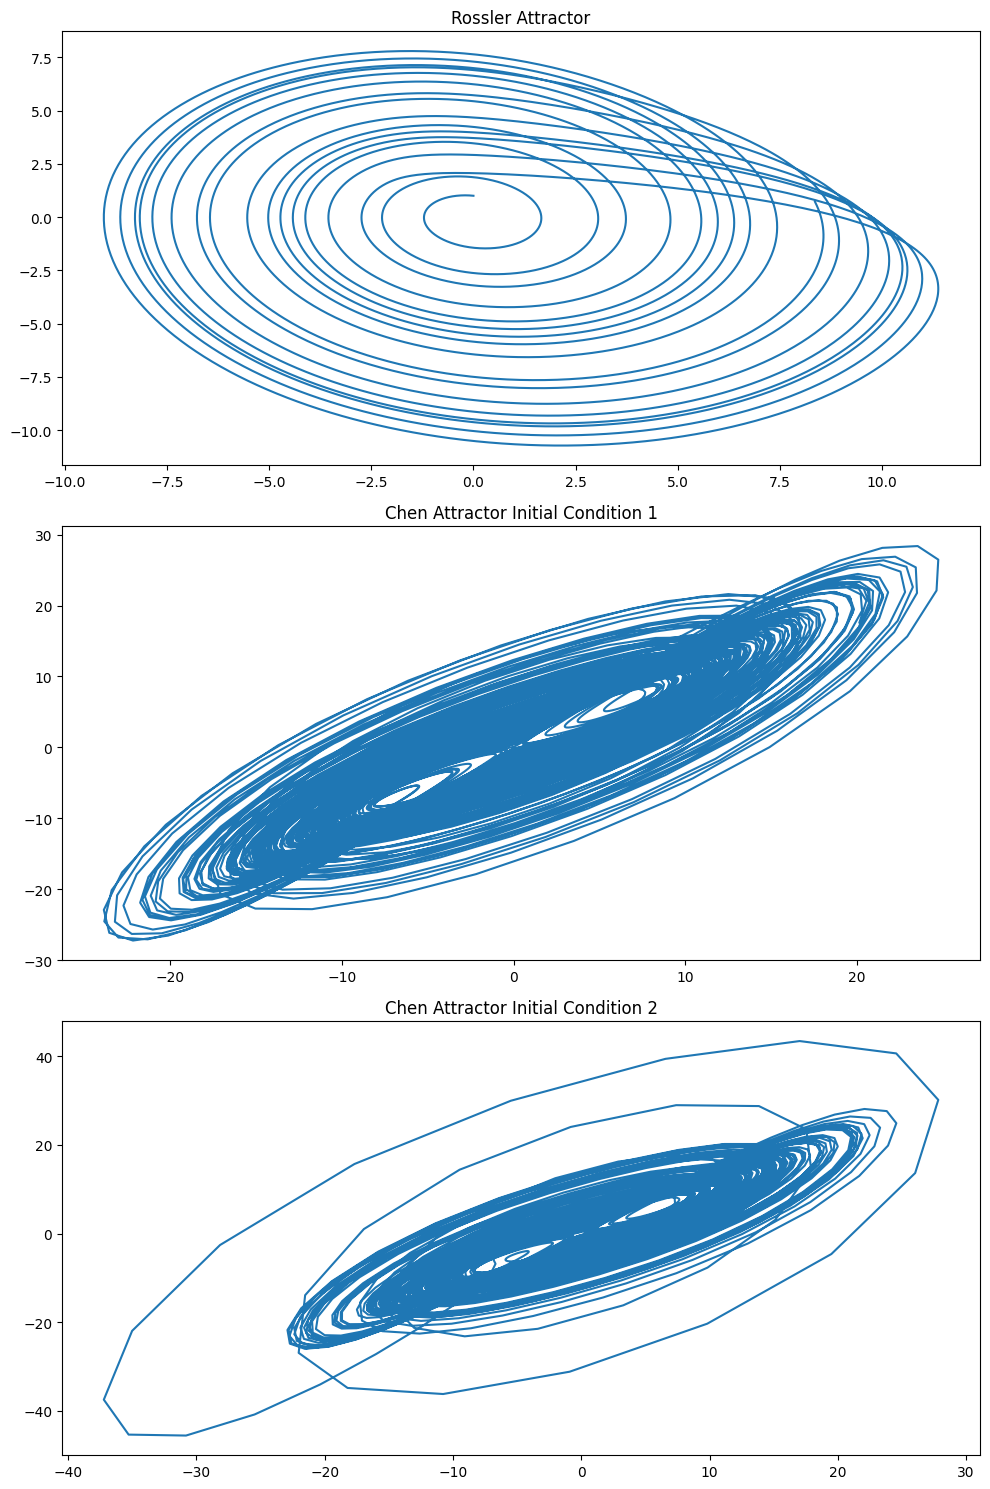

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def rk4_step(f, x, t, dt):
    """
    Perform a single step of the RK4 method.
    """
    k1 = f(x, t)
    k2 = f(x + 0.5 * k1 * dt, t + 0.5 * dt)
    k3 = f(x + 0.5 * k2 * dt, t + 0.5 * dt)
    k4 = f(x + k3 * dt, t + dt)
    return x + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

def rk4(f, x0, t0, tf, dt):
    """
    Run the RK4 method for a system of ODEs.
    """
    t = np.arange(t0, tf, dt)
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(1, len(t)):
        x[i] = rk4_step(f, x[i-1], t[i-1], dt)
    return t, x

# Rossler attractor
def rossler_attractor(x, t):
    a, b, c = 0.2, 0.2, 5.7
    dxdt = -x[1] - x[2]
    dydt = x[0] + a*x[1]
    dzdt = b + x[2]*(x[0] - c)
    return np.array([dxdt, dydt, dzdt])

# Chen attractor
def chen_attractor(x, t):
    a, b, c = 35, 3, 28
    dxdt = a*(x[1] - x[0])
    dydt = (c - a)*x[0] - x[0]*x[2] + c*x[1]
    dzdt = x[0]*x[1] - b*x[2]
    return np.array([dxdt, dydt, dzdt])

# Initial conditions
rossler_initial = np.array([0, 1, 0])  # Rossler
chen_initial_1 = np.array([5, 10, 10])  # Chen 1
chen_initial_2 = np.array([-7, -5, -10])  # Chen 2

# Time span
t0, tf, dt = 0, 100, 0.01

# Simulate
t, rossler_solution = rk4(rossler_attractor, rossler_initial, t0, tf, dt)
_, chen_solution_1 = rk4(chen_attractor, chen_initial_1, t0, tf, dt)
_, chen_solution_2 = rk4(chen_attractor, chen_initial_2, t0, tf, dt)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Rossler Attractor
axs[0].plot(rossler_solution[:, 0], rossler_solution[:, 1])
axs[0].set_title('Rossler Attractor')

# Chen Attractor Initial Condition 1
axs[1].plot(chen_solution_1[:, 0], chen_solution_1[:, 1])
axs[1].set_title('Chen Attractor Initial Condition 1')

# Chen Attractor Initial Condition 2
axs[2].plot(chen_solution_2[:, 0], chen_solution_2[:, 1])
axs[2].set_title('Chen Attractor Initial Condition 2')

plt.tight_layout()
plt.show()


- This roughly took around 1 minute to code from using the chat gpt 4.0 model, with this request:
Can you build me a script that can perform rk4 method with the rossler and Chen attractor with these initial conditions:

initial conditions: 
Rossler: 
x0, y0, z0 = 0, 1, 0

Chen: 
x1,y1,z1 = 5,10,10
x2,y2,z2 = -7,-5,-10

# Chat GPT 3.5 turbo model

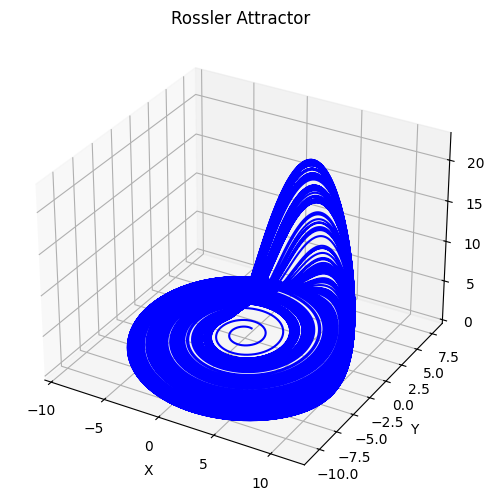

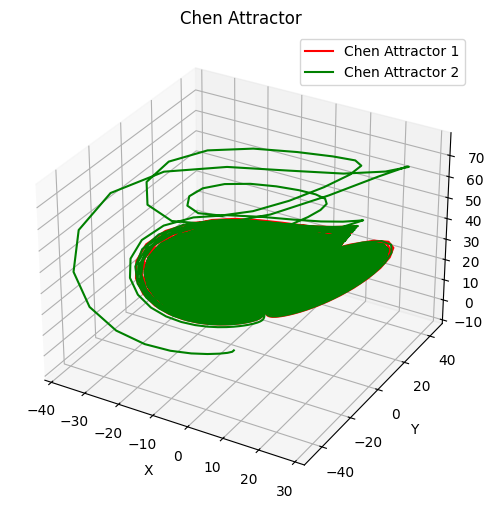

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rossler attractor equations
def rossler(x, y, z, a=0.2, b=0.2, c=5.7):
    dx = -y - z
    dy = x + a * y
    dz = b + z * (x - c)
    return dx, dy, dz

# Define the Chen attractor equations
def chen(x, y, z, a=35, b=3, c=28):
    dx = a * (y - x)
    dy = (c - a) * x - x * z + c * y
    dz = x * y - b * z
    return dx, dy, dz

# Define the RK4 method for solving differential equations
def rk4_step(func, x, y, z, h):
    k1x, k1y, k1z = func(x, y, z)
    k2x, k2y, k2z = func(x + 0.5 * h * k1x, y + 0.5 * h * k1y, z + 0.5 * h * k1z)
    k3x, k3y, k3z = func(x + 0.5 * h * k2x, y + 0.5 * h * k2y, z + 0.5 * h * k2z)
    k4x, k4y, k4z = func(x + h * k3x, y + h * k3y, z + h * k3z)
    x_new = x + (h / 6.0) * (k1x + 2 * k2x + 2 * k3x + k4x)
    y_new = y + (h / 6.0) * (k1y + 2 * k2y + 2 * k3y + k4y)
    z_new = z + (h / 6.0) * (k1z + 2 * k2z + 2 * k3z + k4z)
    return x_new, y_new, z_new

# Parameters for numerical integration
t_max = 1000
dt = 0.01
num_steps = int(t_max / dt)

# Initial conditions for Rossler attractor
x0, y0, z0 = 0, 1, 0

# Arrays to store the solution
rossler_solution = np.zeros((num_steps, 3))
rossler_solution[0] = [x0, y0, z0]

# Perform numerical integration for Rossler attractor
for i in range(1, num_steps):
    x, y, z = rk4_step(rossler, rossler_solution[i - 1, 0], rossler_solution[i - 1, 1], rossler_solution[i - 1, 2], dt)
    rossler_solution[i] = [x, y, z]

# Plot Rossler attractor
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(rossler_solution[:, 0], rossler_solution[:, 1], rossler_solution[:, 2], color='b')
ax.set_title('Rossler Attractor')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Initial conditions for Chen attractor
x1, y1, z1 = 5, 10, 10
x2, y2, z2 = -7, -5, -10

# Arrays to store the solution
chen_solution1 = np.zeros((num_steps, 3))
chen_solution1[0] = [x1, y1, z1]
chen_solution2 = np.zeros((num_steps, 3))
chen_solution2[0] = [x2, y2, z2]

# Perform numerical integration for Chen attractor
for i in range(1, num_steps):
    x1, y1, z1 = rk4_step(chen, chen_solution1[i - 1, 0], chen_solution1[i - 1, 1], chen_solution1[i - 1, 2], dt)
    chen_solution1[i] = [x1, y1, z1]
    x2, y2, z2 = rk4_step(chen, chen_solution2[i - 1, 0], chen_solution2[i - 1, 1], chen_solution2[i - 1, 2], dt)
    chen_solution2[i] = [x2, y2, z2]

# Plot Chen attractor
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(chen_solution1[:, 0], chen_solution1[:, 1], chen_solution1[:, 2], color='r', label='Chen Attractor 1')
ax.plot(chen_solution2[:, 0], chen_solution2[:, 1], chen_solution2[:, 2], color='g', label='Chen Attractor 2')
ax.set_title('Chen Attractor')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()


## Results

- GPT 3.5 uses a 3d plot rather than the 4.0 GPT without request for a plot
- 3.5 was much faster than the 4.0 with similar accuracy